In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kurtosis, skew
import scipy.stats as stats  
from scipy.interpolate import interp1d

In [13]:
import warnings
sns.set_theme()
warnings.filterwarnings('ignore')

# Question 1

In [14]:
CAC40 = pd.read_csv('^FCHI.csv', sep=";", parse_dates=["Date"], dayfirst = True)
US = pd.read_csv('^IRX.csv', sep=";", parse_dates=["Date"], dayfirst = True)
EN = pd.read_csv('EN.PA.csv', sep=";", parse_dates=["Date"], dayfirst = True)
SW = pd.read_csv('SW.PA.csv', sep=";", parse_dates=["Date"], dayfirst = True)


In [15]:
CAC40['Date'] = pd.to_datetime(CAC40['Date'])
CAC40 = CAC40.sort_values(by = 'Date')
CAC40.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-24,5377.859863,5413.029785,5377.859863,5394.799805,5394.799805,74560600
1,2017-10-25,5399.609863,5416.540039,5364.160156,5374.890137,5374.890137,80466800
2,2017-10-26,5383.439941,5459.609863,5375.259766,5455.399902,5455.399902,90950700
3,2017-10-27,5470.339844,5513.529785,5470.240234,5494.129883,5494.129883,95585200
4,2017-10-30,5488.330078,5507.560059,5487.290039,5493.629883,5493.629883,67428800


In [16]:
US['Date'] = pd.to_datetime(US['Date'])
US = US.sort_values(by = 'Date')
US.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-24,1.098,1.098,1.098,1.098,1.098,0
1,2017-10-25,1.095,1.098,1.080,1.083,1.083,0
2,2017-10-26,1.080,1.083,1.075,1.080,1.080,0
3,2017-10-27,1.075,1.075,1.073,1.073,1.073,0
4,2017-10-30,1.073,1.080,1.073,1.075,1.075,0


In [17]:
EN['Date'] = pd.to_datetime(EN['Date'])
EN = EN.sort_values(by = 'Date')
EN.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-24,40.130001,40.430000,40.130001,40.369999,40.369999,420391
1,2017-10-25,40.299999,40.650002,40.125000,40.195000,40.195000,507518
2,2017-10-26,40.180000,41.189999,40.110001,41.189999,41.189999,957886
3,2017-10-27,41.205002,41.345001,40.884998,40.900002,40.900002,851397
4,2017-10-30,40.884998,41.334999,40.709999,41.180000,41.180000,868344


In [18]:
SW['Date'] = pd.to_datetime(SW['Date'])
SW = SW.sort_values(by = 'Date')
SW.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-24,103.599998,104.449997,103.500000,104.150002,101.378716,192956
1,2017-10-25,103.949997,106.050003,103.849998,105.849998,103.033478,335314
2,2017-10-26,105.849998,106.199997,105.349998,105.750000,102.936142,272612
3,2017-10-27,106.099998,108.800003,106.050003,108.599998,105.710304,317334
4,2017-10-30,108.349998,108.750000,107.800003,108.500000,105.612968,162316


# Question 2

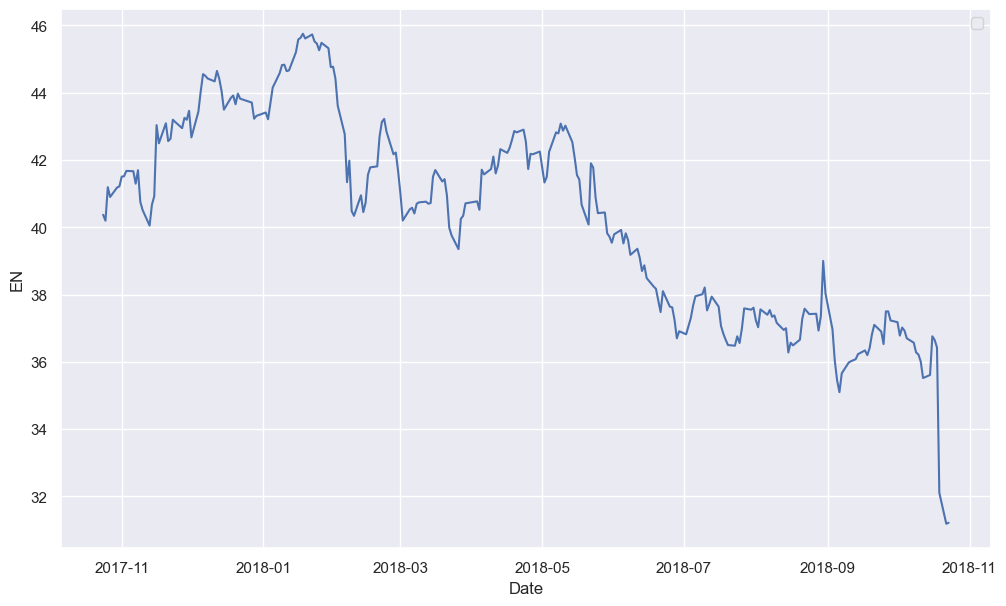

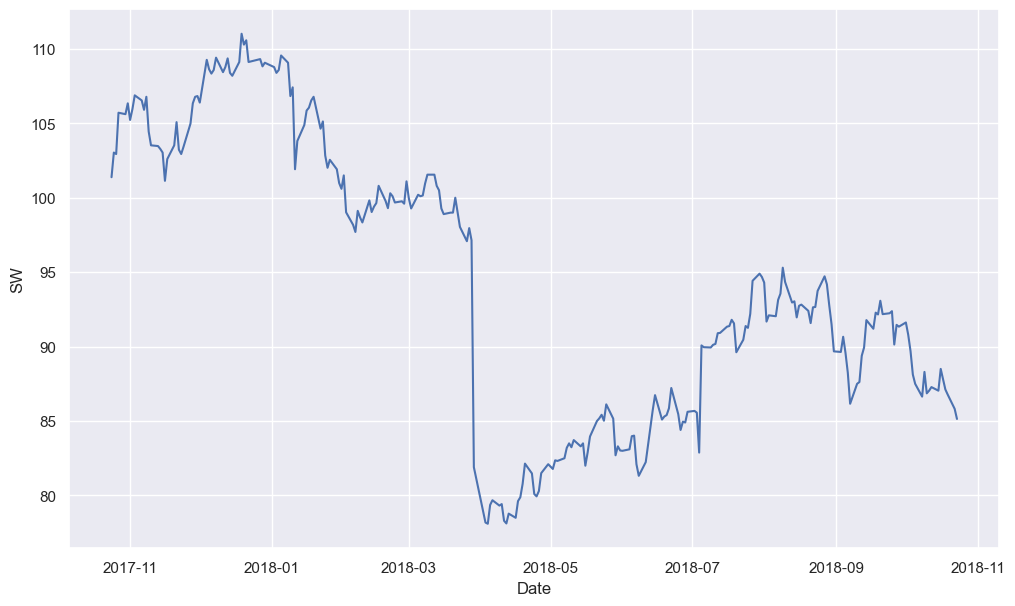

In [19]:
plt.figure(figsize=(12, 7))
plt.plot(EN['Date'], EN['Adj Close'])
plt.xlabel("Date")
plt.ylabel("EN")
plt.legend()
plt.show()

plt.figure(figsize=(12, 7))
plt.plot(SW['Date'], SW['Adj Close'])
plt.xlabel("Date")
plt.ylabel("SW")
plt.show()

Analysis : 

- Volatility and Risk:

Both stocks exhibit high volatility, particularly around early 2018 and late 2018. The sharp drops suggest events such as earnings reports, regulatory changes, or industry-wide downturns.
The SW stock seems to recover slightly better than EN after the initial drop, but both remain in a downward trajectory towards the end of the period.
The SW stock still appears to be a bit more stable than the EN stock.

- Market Efficiency :

The rapid declines seen in both stocks suggest strong market reactions, possibly due to new information becoming available. This aligns with the Efficient Market Hypothesis (EMH), where stock prices quickly adjust to new information.
The partial recovery in SW could indicate investor confidence or temporary market overreaction.

# Question 3

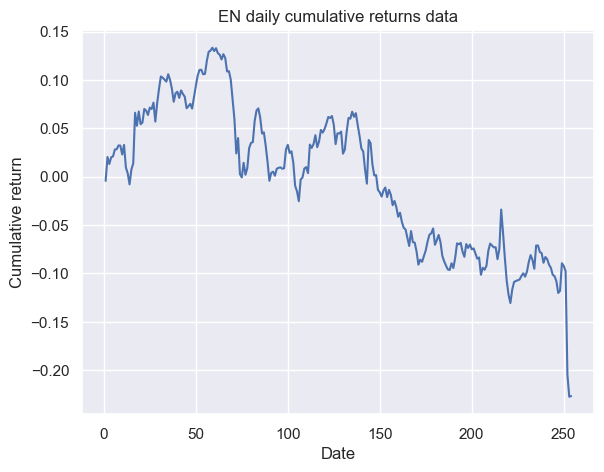

np.float64(-0.2266534611506934)

In [20]:
#Daily returns EN
EN['Daily Return'] = EN['Adj Close'].pct_change()

#Total return EN
EN['Cumulative Return'] = (1 + EN['Daily Return']).cumprod() - 1

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
EN['Cumulative Return'].plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Cumulative return")
ax1.set_title("EN daily cumulative returns data")
plt.show()

EN['Cumulative Return'].iloc[-1]

Comment : The stock price of EN decreased by nearly 23%.

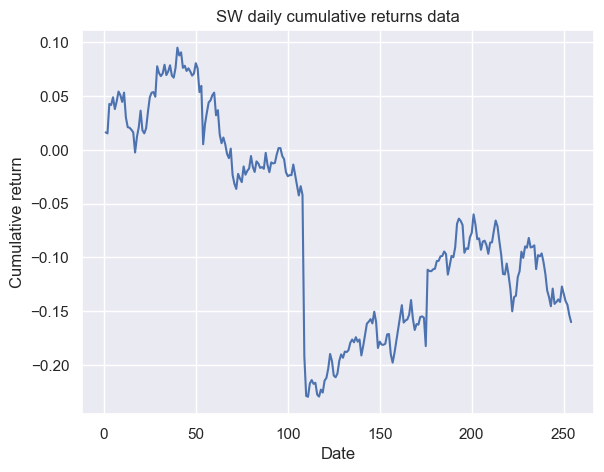

np.float64(-0.16017875980989782)

In [21]:
# Daily returns SW
SW['Daily Return'] = SW['Adj Close'].pct_change()

# Total return SW
SW['Cumulative Return'] = (1 + SW['Daily Return']).cumprod() - 1

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
SW['Cumulative Return'].plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Cumulative return")
ax1.set_title("SW daily cumulative returns data")
plt.show()

SW['Cumulative Return'].iloc[-1]

Comment : The stock price of SW decreased by 16%.

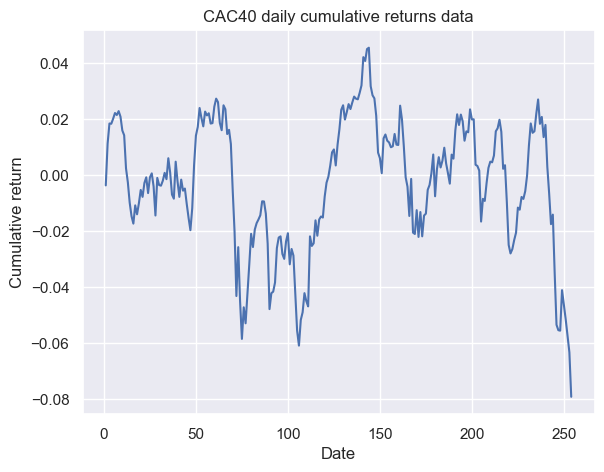

np.float64(-0.07917066053204402)

In [22]:
# CAC40 daily returns
CAC40['Daily Return'] = CAC40['Adj Close'].pct_change()

# CAC40 total return
CAC40['Cumulative Return'] = (1 + CAC40['Daily Return']).cumprod() - 1

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
CAC40['Cumulative Return'].plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Cumulative return")
ax1.set_title("CAC40 daily cumulative returns data")
plt.show()

CAC40['Cumulative Return'].iloc[-1]

Comment : The stock price of CAC40 decreased by 8%.

# Question 4

The coefficient of Kurtosis for EN is  -0.6796967312420157  and the coefficient of asymmetry is -0.18291522909333563


<Axes: xlabel='Adj Close', ylabel='Density'>

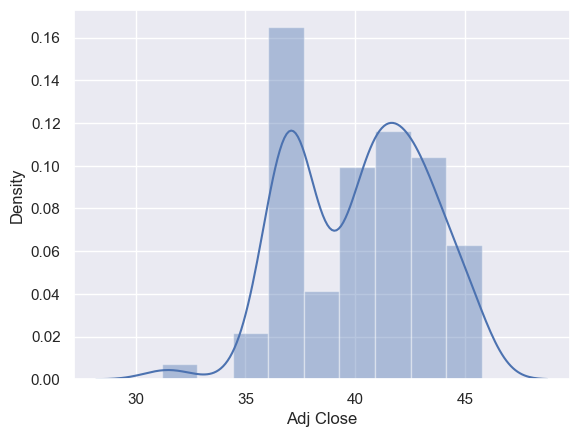

In [23]:
kurtosis_EN = kurtosis(EN['Adj Close'])
skewness_EN = skew(EN['Adj Close'])

print("The coefficient of Kurtosis for EN is ",
      kurtosis_EN,
      " and the coefficient of asymmetry is",
      skewness_EN)

#histograms 
sns.distplot(EN['Adj Close'])

The coefficient of Kurtosis for SW is  -1.2196454070061347  and the coefficient of asymmetry is 0.08807735109191732


<Axes: xlabel='Adj Close', ylabel='Density'>

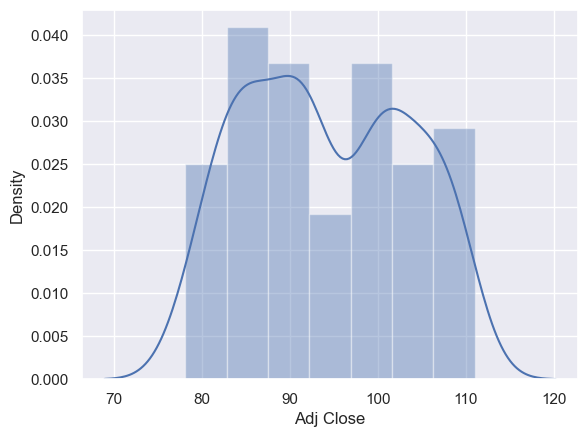

In [24]:
kurtosis_SW = kurtosis(SW['Adj Close'])
skewness_SW = skew(SW['Adj Close'])

print("The coefficient of Kurtosis for SW is ",
        kurtosis_SW,
        " and the coefficient of asymmetry is",
        skewness_SW)

sns.distplot(SW['Adj Close'])

The coefficient of Kurtosis for CAC40 is  0.029901183339525517  and the coefficient of asymmetry is -0.6305346103146633


<Axes: xlabel='Adj Close', ylabel='Density'>

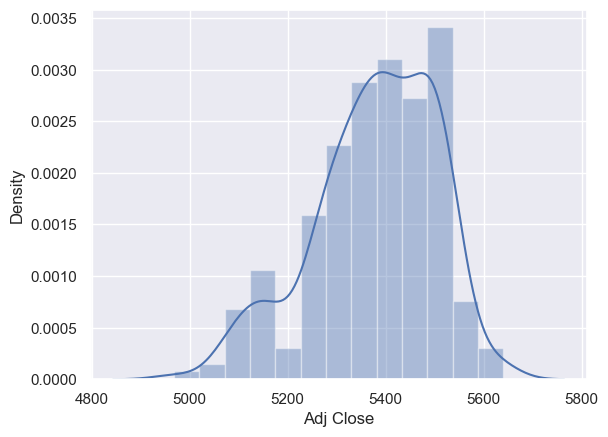

In [25]:
kurtosis_CAC40 = kurtosis(CAC40['Adj Close'])
skewness_CAC40 = skew(CAC40['Adj Close'])

print("The coefficient of Kurtosis for CAC40 is ",
        kurtosis_CAC40,
        " and the coefficient of asymmetry is",
        skewness_CAC40)

sns.distplot(CAC40['Adj Close'])

Comment : 
CAC40 indexes are closer to a normal distribution than SW and EN stocks. This can be explained by the fact that cac40 is made of different stocks and due to the Central Limit Theorem, its distribution may tend to a normal one. 
SW is quite symetric, comparing to the others.

# Question 5


In [26]:
#EN

# Full period
EN_std_err_full = np.std(EN['Daily Return'], 
                         ddof=1) / np.sqrt(len(EN['Daily Return']))

print("EN full period standard error:", EN_std_err_full)

EN_sub_periods = np.array_split(EN['Daily Return'], 3)

# Sub-periods
for i in range(3):
    EN_std_err = np.std(EN_sub_periods[i],
                        ddof=1) / np.sqrt(len(EN_sub_periods[i]))
    print(f"EN sub-period {i+1} standard error:", EN_std_err)

EN full period standard error: 0.0008764556604938009
EN sub-period 1 standard error: 0.0013368542903145339
EN sub-period 2 standard error: 0.001248281153789272
EN sub-period 3 standard error: 0.0018864502130148935


Comment : For EN stocks, the volatility seems quite stable over time.

In [27]:
#SW

# Full period
SW_std_err_full = np.std(SW['Daily Return'], 
                         ddof=1) / np.sqrt(len(SW['Daily Return']))

print("SW full period standard error:", SW_std_err_full)

SW_sub_periods = np.array_split(SW['Daily Return'], 3)

# Sub-periods
for i in range(3):
    SW_std_err = np.std(SW_sub_periods[i],
                        ddof=1) / np.sqrt(len(SW_sub_periods[i]))
    print(f"SW sub-period {i+1} standard error:", SW_std_err)

SW full period standard error: 0.001005547263067501
SW sub-period 1 standard error: 0.0012944528764157592
SW sub-period 2 standard error: 0.002202790106420725
SW sub-period 3 standard error: 0.0016126678123130074


Comment : For SW stocks, the volatility changes a bit more than for EN stocks.

# Question 6

In [28]:
corr_EN = EN['Adj Close'].corr(CAC40['Adj Close'])
corr_EN

np.float64(0.25638283093580444)

In [29]:
corr_SW = SW['Adj Close'].corr(CAC40['Adj Close'])
corr_SW

np.float64(-0.010956475940059114)

Comment : We can see that there is a weak positive correlation between the EN stock and the cac40 index. The SW stock has virtually no correlation with the cac40 index.

# Question 7

In [38]:
portfolio = (EN['Daily Return']  + SW['Daily Return'])/2
portfolio_d_return = portfolio.mean()
print("Portfolio daily Return: ", portfolio_d_return)

portfolio_std =portfolio.std()
print("Portfolio Standard Deviation: ", portfolio_std)

portfolio_total_return = (portfolio + 1).prod() - 1
print("Total Portfolio Return: ", portfolio_total_return)

Portfolio daily Return:  -0.0007325577137104219
Portfolio Standard Deviation:  0.01111467983002797
Total Portfolio Return:  -0.1828809925586704


Comment : A return of -18% indicates a poor overall performance, meaning the portfolio has lost 18% of its value over the analyzed period. The standard deviation of 1.11% suggests that the portfolio’s daily returns fluctuate within ±1.11% of the mean daily return on average. This relatively low standard deviation implies that the portfolio is relatively stable in terms of daily volatility, even though its overall return is negative.


# Question 8

In [ ]:
A = 1.5 

#Daily rebalancing
daily_risk_free_rate = US["Adj Close"].pct_change().dropna().mean()

w_star = (EN["Daily Return"].mean() - daily_risk_free_rate) / (A * EN["Daily Return"].var())

print("Daily rebalancing:")
print("Weight of Bouygues in the portfolio:", (w_star * 100).round(2), "%")
print("Weight of US (13-week T-bills) in the portfolio:", ((1 - w_star) * 100).round(2), "%")

# Annual rebalancing

annualized_risk_free_rate = (1 + daily_risk_free_rate) ** 252 - 1

annualized_return = (1 + EN["Daily Return"].mean()) ** 252 - 1
annualized_risk = EN["Daily Return"].std() * np.sqrt(252)

w_star = (annualized_return - annualized_risk_free_rate) / (A * annualized_risk**2)
print("\nAnnual rebalancing:")
print("Weight of Bouygues in the portfolio:", (w_star * 100).round(2), "%")
print("Weight of US (13-week T-bills) in the portfolio:", ((1 - w_star) * 100).round(2), "%")


Daily rebalancing:
Weight of Bouygues in the portfolio: -1337.74 %
Weight of US (13-week T-bills) in the portfolio: 1437.74 %

Annual rebalancing:
Weight of Bouygues in the portfolio: -1813.52 %
Weight of US (13-week T-bills) in the portfolio: 1913.52 %


Comment : Daily rebalancing allows for more frequent adjustments to account for short-term fluctuations in returns, leading to a higher allocation to the risky asset (Air Liquide).

On the other hand, annual rebalancing smooths out these fluctuations, resulting in a lower allocation to the risky asset and a higher allocation to the risk-free asset over the longer term.

However, the risky asset performs very poorly (see the first questions), so the rebalancing heavily favors the risk-free asset.

# Question 9 

[np.float64(0.01109277896179293), np.float64(0.0139682964241528), np.float64(0.01602566207525994)]


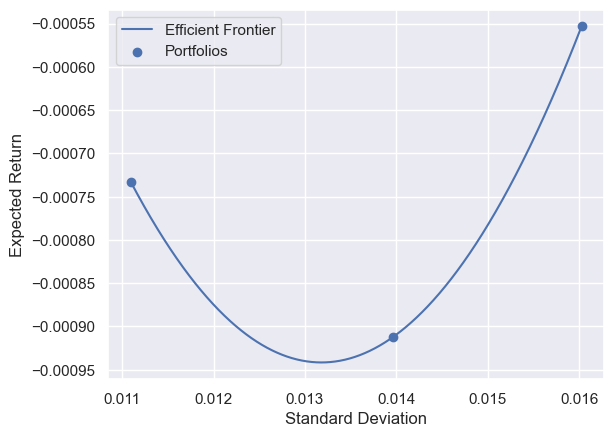

In [32]:
from scipy.interpolate import CubicSpline

portfolio1 = EN['Daily Return']
portfolio2 = SW['Daily Return']
portfolio3 = (EN['Daily Return']  + SW['Daily Return'])/2

# Return and standard deviation for each portfolio
portfolios = [portfolio3, portfolio1, portfolio2]
expected_return = [np.mean(p) for p in portfolios]
std_dev = [np.std(p) for p in portfolios]
print(std_dev)


# Interpolation function 
x = np.linspace(min(std_dev), max(std_dev), 1000)
efficient_frontier = CubicSpline(std_dev, expected_return)


# Plot the efficient frontier curve
plt.plot(x, efficient_frontier(x), label='Efficient Frontier')

plt.scatter(std_dev, expected_return, label='Portfolios')

plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.legend()
plt.show()


Comment : The portfolio 1 for EN is inefficient. since the 3rd portfolio has a better expected return AND a lower standart deviation.

# Question 10

In [33]:
risk_free_rate = 0.01

sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std
sortino_ratio = (portfolio_return - risk_free_rate) / portfolio[portfolio < 0].std()
sterling_ratio = portfolio_return / (portfolio[portfolio < 0].sum() / len(portfolio[portfolio < 0]))

print("Sharpe ratio :", sharpe_ratio)
print("sortino ration :", sortino_ratio)
print("strermin gration :", sterling_ratio)

Sharpe ratio : -0.9656200518448415
sortino ration : -1.1033807600182224
strermin gration : 0.08608233617886497


Comment : 
  Sharpe Ratio considers total risk and uses standard deviation adn is best for general risk-adjusted return.

  


Sortino Ratio ignores positive volatility and considers downside risk. It's better to focus on losses, and not volatility.

Sterling Ratio uses max drawdown and is then ideal for drawdown risk.

# Question 11


In [34]:
VAR = portfolio.quantile(0.01)
print("Empirical VAR at 1% :", VAR)

Empirical VAR at 1% : -0.02489024712077525


In [35]:
quantile = stats.norm.ppf(0.01, portfolio_return, portfolio_std)
print("1st percentile of the normal distribution :", quantile)
     

1st percentile of the normal distribution : -0.026589169506940603


Comment : The real-world losses appear slightly lower than what a normal model predicts. But, still, both looses are nearly identical.

# Question 12

New portfolio shape: (1000, 1)
VAR at 1% (bootstrapping): -0.06124313314020613


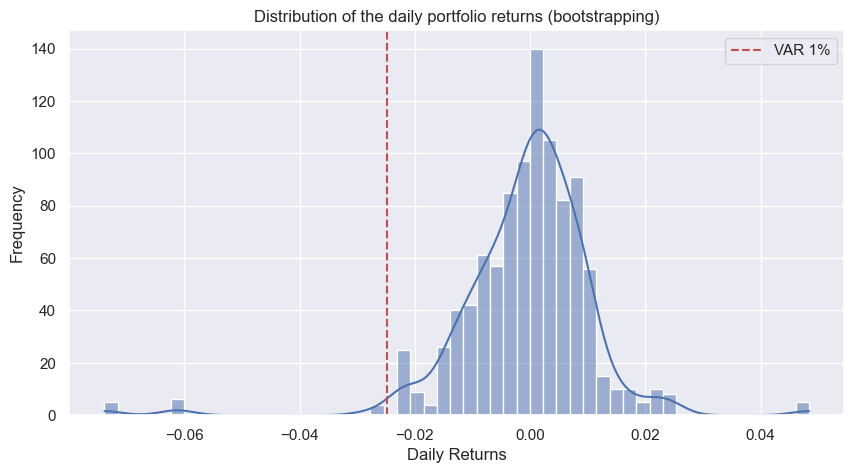

In [36]:
num_samples = 1000

resampled_returns = np.random.choice(portfolio, size=num_samples, replace=True)
resampled_portfolio = pd.DataFrame(resampled_returns)
print("New portfolio shape:", resampled_portfolio.shape)

var = resampled_portfolio.quantile(0.01).values[0]
print("VAR at 1% (bootstrapping):", var)

plt.figure(figsize=(10, 5))
sns.histplot(resampled_portfolio, kde=True)
plt.axvline(VAR, color="r", linestyle="--", label="VAR 1%")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.title("Distribution of the daily portfolio returns (bootstrapping)")
plt.legend()
plt.grid(True)
plt.show()

Comment : The distribution appears approximately normal, but with some asymmetry and fat tails. The red dashed line marks the 1% empirical VaR threshold.
This shows that 1% of the worst daily returns fall below this threshold.The left tail is fatter than a normal distribution suggests. This implies higher-than-expected downside risk, meaning the portfolio is exposed to extreme losses more frequently than normal VaR predicts.